In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Possible Colour Palettes to Choose from

Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r



# Categorical Data

Today, we will start off with some visualisations of categorical data. In particular, we will visualise some aspects of a famous data set: Titanic. This data set contains data on the costs of the fare, the class of each passenger, whether he or she survived as well as the passenger's gender. 

### Data Set: Titanic

First, we will set the style. There are several styles to choose from: white, dark, whitegrid, darkgrid or ticks. Here we will use whitegrid. 

In [ ]:
sns.set(style = 'whitegrid')
#sns.set_style('ticks', {'axes.grid': True, 'xtick.direction': 'in'})

Having set the style, we now read in the data and observe the first 5 elements of the list. Each row correspond to a passenger. 

In [ ]:
#Load the data set
titanic = sns.load_dataset('titanic')

#Display the first 5 rows. 
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Now, Pandas allows us to get a summary of the data. We can obtain this summary using the .describe method. 

In [ ]:
#Print a summary of the data. 
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


As can be seen, there were only 891 passengers who survived. There is something more going on in this data set. Do you what? Could there be groups of people who survived? Hint: women and children first!

In [ ]:
#Make a correlation matrix
correlation = titanic.corr()
correlation

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


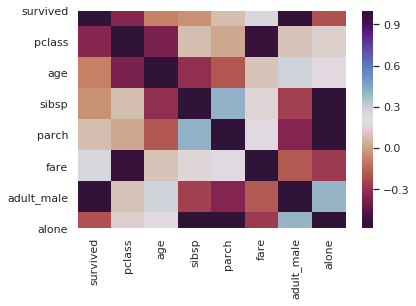

In [ ]:
sns.heatmap(correlation, cmap="twilight_shifted_r")

It seems that the so called numerical variables are not strongly correlated to the survivel rate. For this reason, we also need to inspect the categorical variables. Let us first have a look at how many survived the horrible ordeal. 

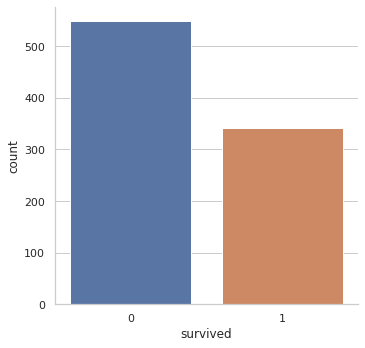

In [ ]:
sns.catplot(x = 'survived', kind = 'count', data = titanic)

It seems that more died than survived. But can we say a bit more than that? 

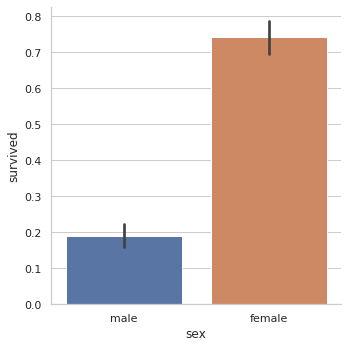

In [ ]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, dodge = True)
#sns.catplot(x = 'survived', kind = 'count', hue = 'sex', data = titanic)

This plot shows that around 70-75% of the women survived, whereas only 20% of the men lived on to tell the story. Yet, can we say some more? If you saw the famous movie Titanic, you probably know that first class passengers were closer to the life boats. Does our data support that? 

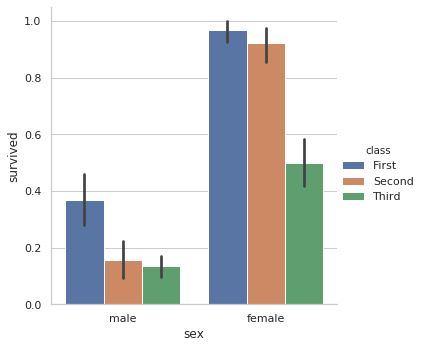

In [ ]:
sns.catplot(x = 'sex', y = 'survived', hue = 'class', kind = 'bar', data = titanic, dodge = True)

Sadly, it seems that the survival rate of first class passengers is about twice as high for men. Now, let us move on from the doom and gloom of the night the Titanic sank and look at some other interesting features in this data set. Let us now have a look at how many of those people were travelling alone. 

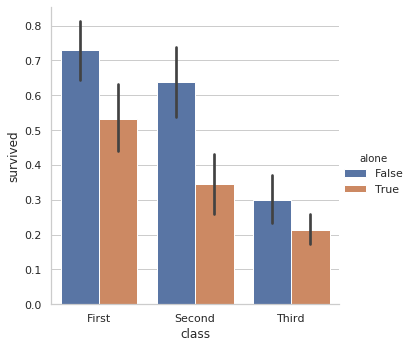

In [ ]:
sns.catplot(x = 'class', y = 'survived', kind = 'bar', hue = 'alone', data = titanic)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


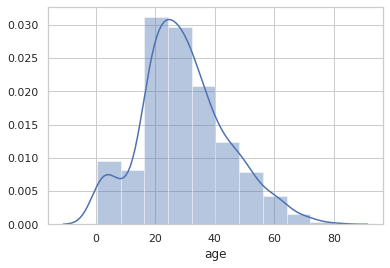

In [ ]:
# Make a histogram
sns.distplot(titanic['age'], kde = True, bins= 10)

It seems that the population age is more or less uniformly distributed. Let us see if this is also the case for the various subgroups (i.e. first, sencond and third class). 

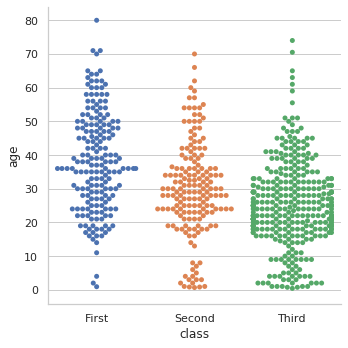

In [ ]:
sns.catplot(x = 'class', y = 'age', kind = 'swarm', data = titanic)

Apparently, in general, the population of the third class was much younger than that of the first and second classes. Let us now look at the distribution of the population among the several decks. 

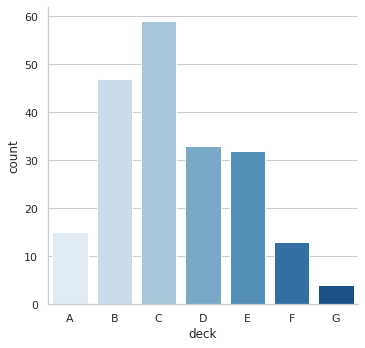

In [ ]:
sns.catplot(x = 'deck', kind = 'count', palette = 'Blues', data = titanic)

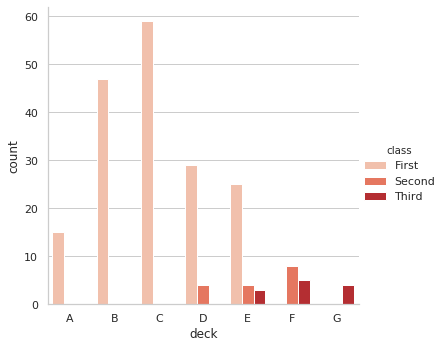

In [ ]:
sns.catplot(x = 'deck', kind = 'count', palette = "Reds", data = titanic, hue = 'class')

Now, let us have a look at the number of survivors per deck. Did it really help to be closer to the life boats? 

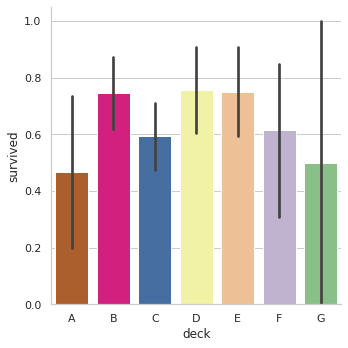

In [ ]:
sns.catplot(x = 'deck', y = 'survived', kind = 'bar', palette = 'Accent_r', data = titanic)

### Human Resources Data Set

The Titanic Data Set is pretty much a classical and very clean one. Let us now have a look at a more recent human resources data set from an anymous american company. Again, first read in the data. 

In [ ]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/HR.csv')
hr_data.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,White,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [ ]:
#Select only active employees
hr_data = hr_data[hr_data['Employment Status'] == 'Active']

Let us first look at the distribution of men and women. 

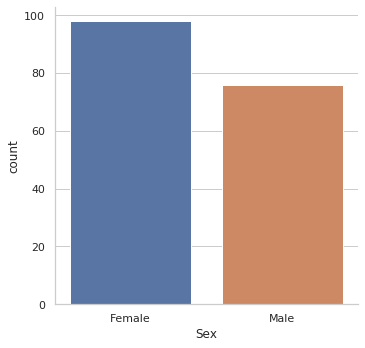

In [ ]:
sns.catplot(x = 'Sex', kind = 'count', data = hr_data)

It looks like this company has more female than male employees. Let us now have a look at the marital status of the employees. 

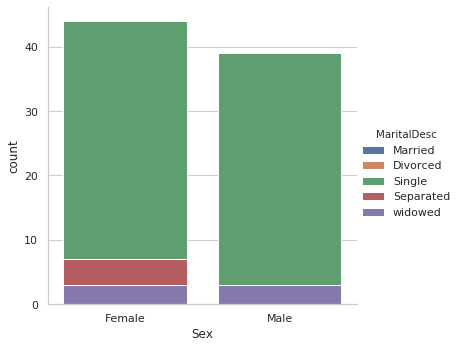

In [ ]:
sns.catplot(x = 'Sex', kind = 'count', hue = 'MaritalDesc', data = hr_data, dodge = False)

The vast majority of the employees is single. Does that show in the age distribution? 

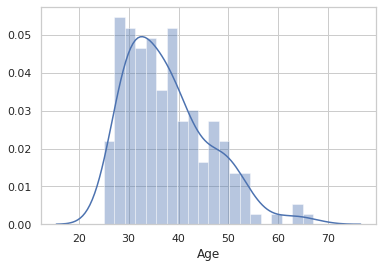

In [ ]:
sns.distplot(hr_data['Age'], kde = True, bins = 20)

In [ ]:
hr_data.describe()

,Employee Number,Zip,Age,Pay Rate
count,1.740000e+02,174.000000,174.000000,174.000000
mean,1.216890e+09,8928.356322,37.793103,32.982586
std,1.914718e+08,21120.609976,8.384734,16.404588
min,6.020003e+08,1013.000000,25.000000,14.000000
25%,1.102024e+09,1907.500000,31.000000,20.000000
50%,1.204533e+09,2134.500000,36.000000,25.000000
75%,1.402816e+09,2451.000000,43.000000,53.000000
max,1.988300e+09,98052.000000,67.000000,80.000000


Let us now look at this company's pay rate.

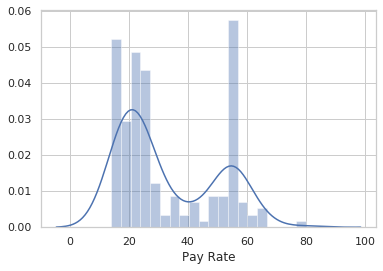

In [ ]:
sns.distplot(hr_data['Pay Rate'], kde = True, bins = 20)

In general, most people earn between 18.000 and 30.000. There are also a couple with a salary of a little bit less than 60.000. Let us now have a closer look at this feat. 

In [ ]:
hr_data.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,White,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


Now let us make a bar plot displaying the various positions in the company. 


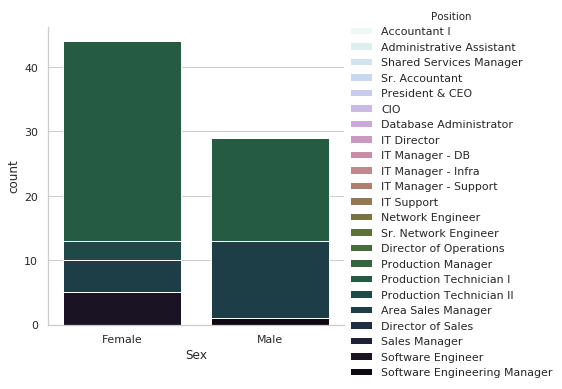

In [ ]:
sns.catplot(x = 'Sex', kind = 'count', hue = 'Position', data = hr_data, dodge = False, palette = 'cubehelix_r')

Let us have a look at the department now. 

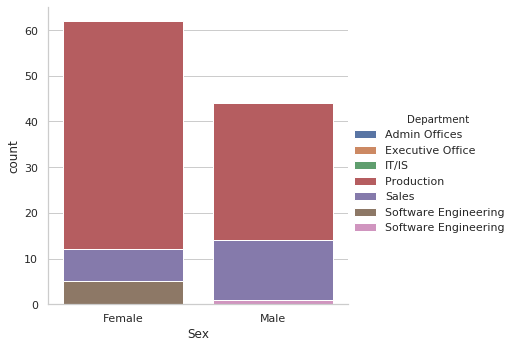

In [ ]:
sns.catplot(x = 'Sex', kind = 'count', hue = 'Department', data = hr_data, dodge = False)

It seems that most female employees work in production. There are more men working in sales, whereas there are more women working in software engineering. Lastly, let us look at the pay rate. 

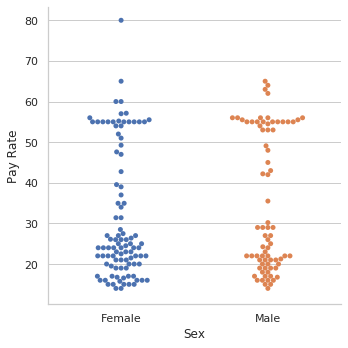

In [ ]:
sns.catplot(x = 'Sex', y = 'Pay Rate', kind = 'swarm', data = hr_data)

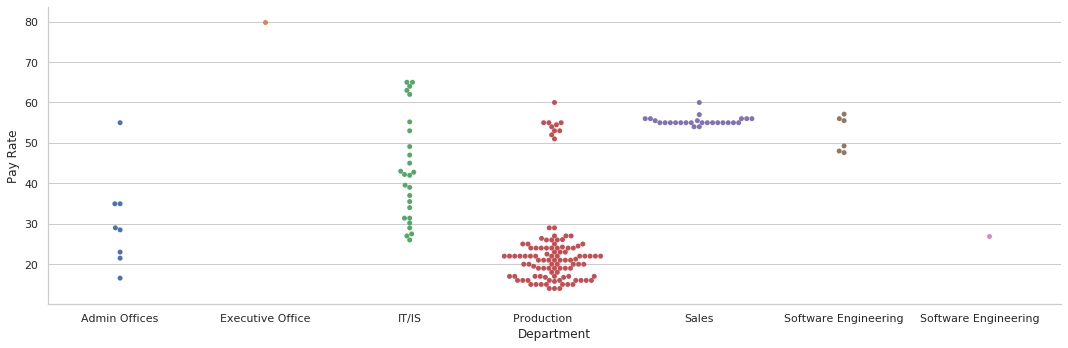

In [ ]:
sns.catplot(x = 'Department', y = 'Pay Rate', kind = 'swarm', data = hr_data, height=5, aspect=3)

<Figure size 720x720 with 0 Axes>

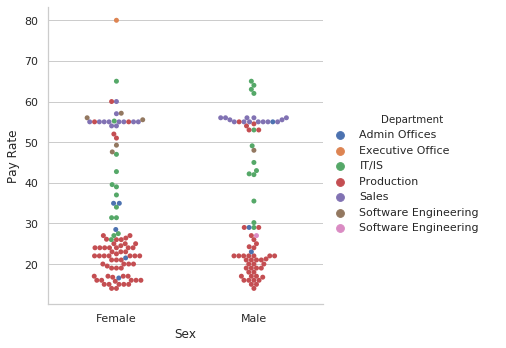

In [ ]:
sns.catplot(x = 'Sex', y = 'Pay Rate', hue = 'Department', kind = 'swarm', data = hr_data)

### Tips Data Set

Now it's your turn. Try to follow the instructions and obtain some useful information from the tips data set. This is a data set containing information from a restaurant and the amount of tips that were given by the guests. First, load in the data.

In [ ]:
#Load in the data here
tips = sns.load_dataset('tips')

In [ ]:
#Inspect the data using the head()-method
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


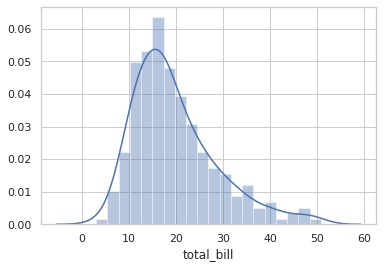

In [ ]:
#Plot the distribution of the total_bill variable
sns.distplot(tips['total_bill'], kde = True, bins = 20)


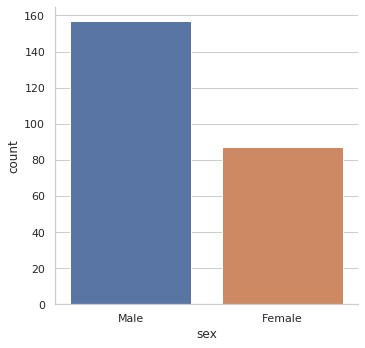

In [ ]:
#Plot the number of men and the number of women using a bar-plot

sns.catplot(x = 'sex', kind = 'count', data = tips)

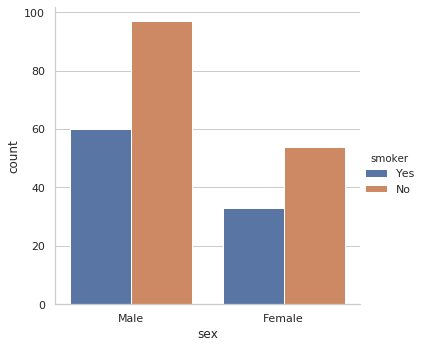

In [ ]:
#Not plot how many men are smokers vs. how many women smoke

sns.catplot(x = 'sex', kind = 'count', hue = 'smoker', data = tips)
#sns.catplot(x = 'sex', kind = 'count', hue = 'smoker', data = tips, dodge = False)

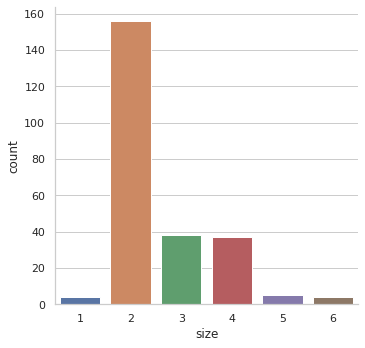

In [ ]:
#Now make a swarm plot displaying the size of the tips 

sns.catplot(x = 'size', kind = 'count', data = tips)

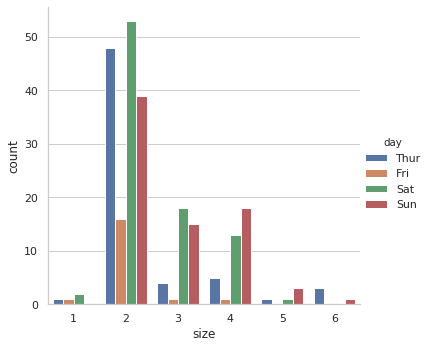

In [ ]:
#Now make a swarm plot displaying the size of the tips per day

sns.catplot(x = 'size', kind = 'count', hue = 'day', data = tips)

# Relational Plots

In Seaborn, it is very easy to create relational plots in which you compare two (or more) variables. In this part of the workshop we will look at how we can make such plots. 

### Tips Data Base

Again, we will investigate the tips data base. First, we will look at whether we can identify some correlations in the data set using the corr()-method.

In [ ]:
correlation_tips = tips.corr()

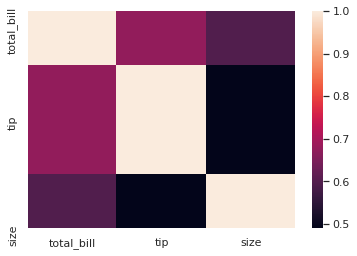

In [ ]:
sns.heatmap(correlation_tips)

On the basis of the heatmap which displays the correlations, there the height of the tip seems to be correlated to the total_bill variable. Let us plot this relationship. 

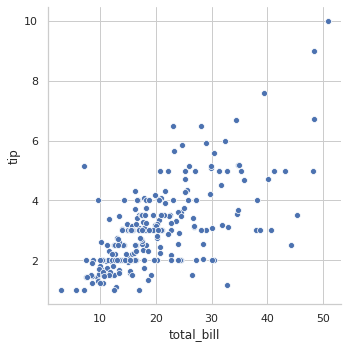

In [ ]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips)

There seems to be a nice linear relationship between tip and total_bill. In other words, the higher the bill, the more people are inclined to tip the waiter. Let us now introduce some hue. 

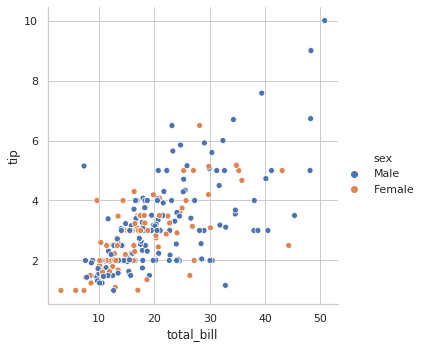

In [ ]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'sex', data = tips)

We have now introduced an additional, categorical variable. Can we add another one? In other words, can we plot a fourth variable? 

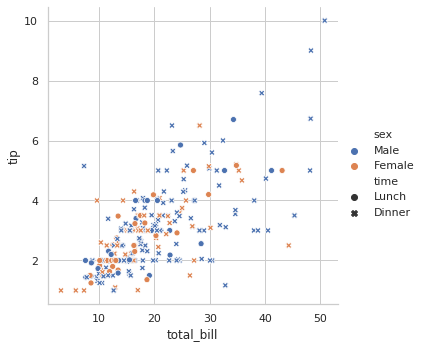

In [ ]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', style = 'time')

Using the style variable, we were able to also include the time the tip was given. Sadly, it is not very visible. Let us therefore create two seperate plots: one for lunch and another one for dinner. 

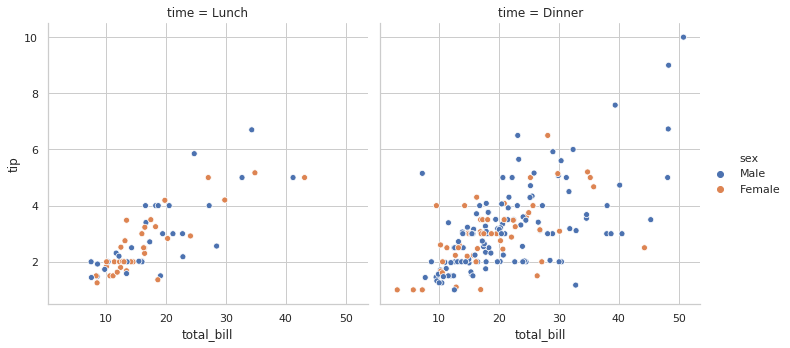

In [ ]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'sex',  col = 'time', data = tips)

Now we can clearly see that during dinner more and higher tips were given. Interestingly, though, the relationship remains the similar. Now, let us creat a similar double facetted plot, this time seperating smokers from non-smokers. 

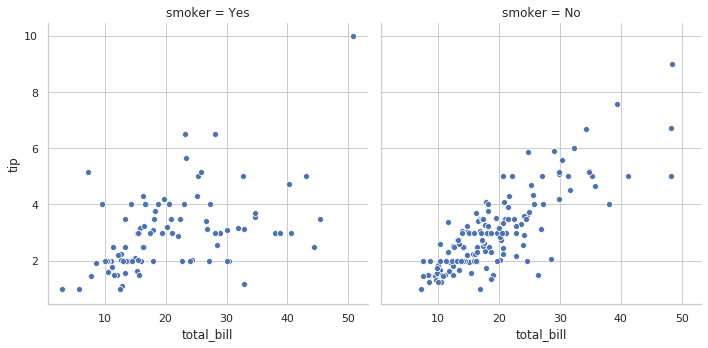

In [ ]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, col = 'smoker')

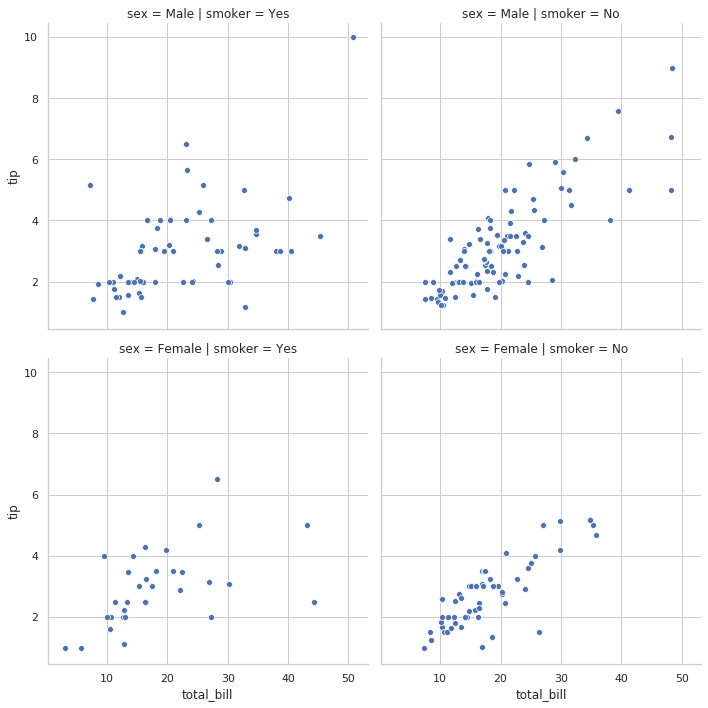

In [ ]:
sns.relplot(x = 'total_bill', y = 'tip', data = tips, col = 'smoker', row = 'sex')

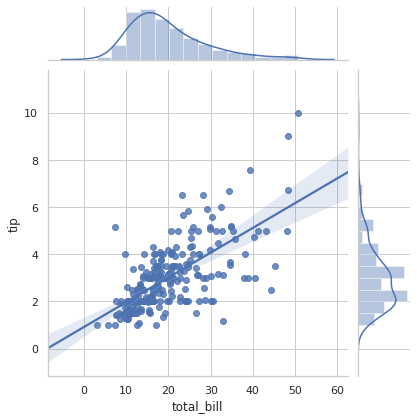

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg')

### Housing Prices Data Set 

In this section, we will analyse the Boston housing prices data set. This data set contains a large number of values. Surely, there will be some relations we can exploit here. 

In [ ]:
housing = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/housing_prices.csv')
housing.head()
#housing.select_dtypes(include='object')
#hr_data.dtypes

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Since there are so many random variable - 81 in total - let us make a correlation matrix.

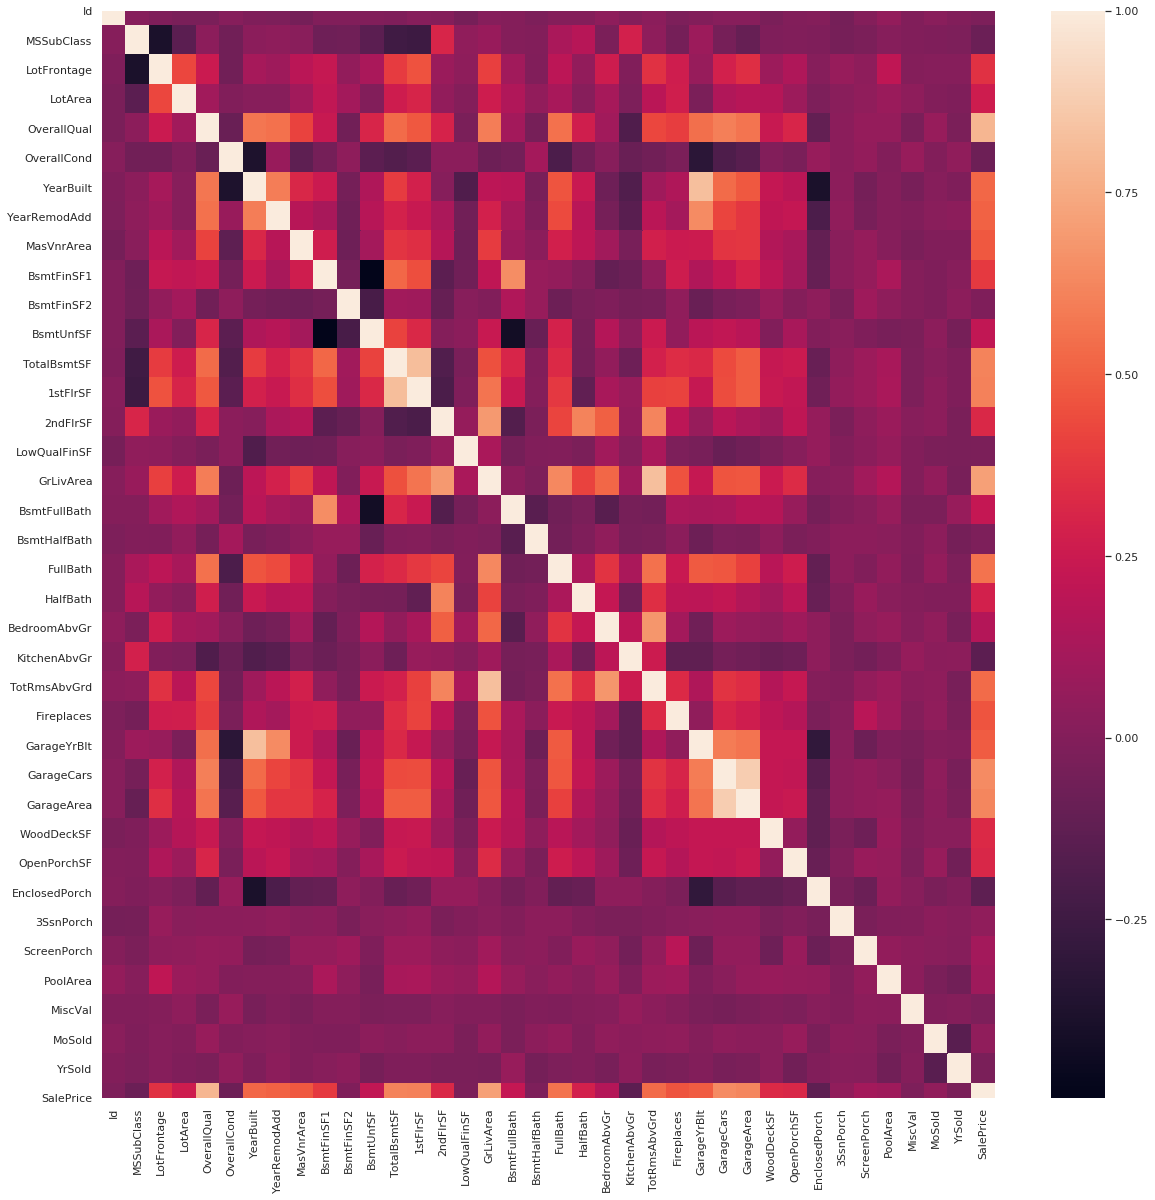

In [ ]:
correlation_house = housing.corr()
plt.figure(figsize = (20,20))
sns.heatmap(correlation_house)

This is a very large matrix. Let us therefore focus on the SalePrice. In particular, let us find the variables that have the highest correlation with the SalePrice variable. These seems to be OverallQual (overall quality) and GrLivArea (size of the living are).  

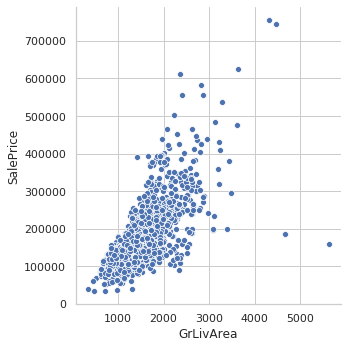

In [ ]:
sns.relplot(x = 'GrLivArea', y = 'SalePrice', data = housing)

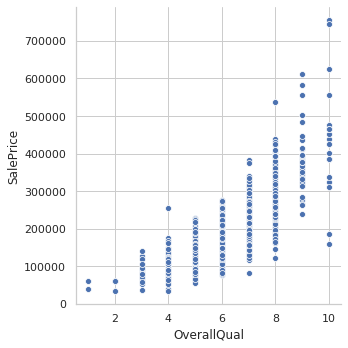

In [ ]:
sns.relplot(x = 'OverallQual', y = 'SalePrice', data = housing)

We can improve the look of the plot above a bit by changing the plot type. 

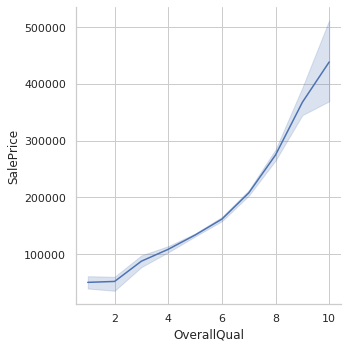

In [ ]:
sns.relplot(x = 'OverallQual', y = 'SalePrice', kind = 'line', data = housing)

Let us now have a look at see if we can plot all three variables in one plot. 

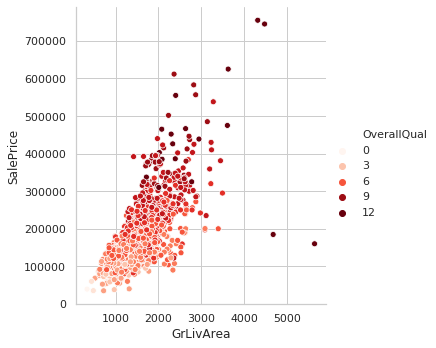

In [ ]:
sns.relplot(x = 'GrLivArea', y = 'SalePrice', hue = 'OverallQual', data = housing, palette = 'Reds')

Here we see that indeed, the higher the Overall Quality of the house, the higher the sales price. Let us plot some other interesting things such as the Lot shape. 

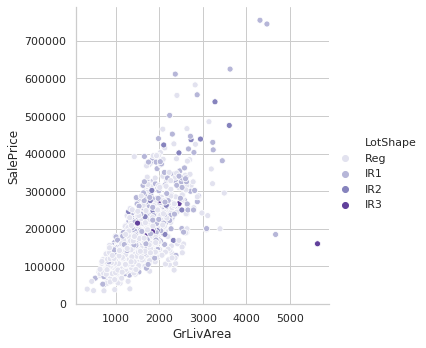

In [ ]:
sns.relplot(x = 'GrLivArea', y = 'SalePrice', hue = 'LotShape', data = housing, palette = 'Purples')

Let us now plot the LotShapes in three facetted plots and compare them. 

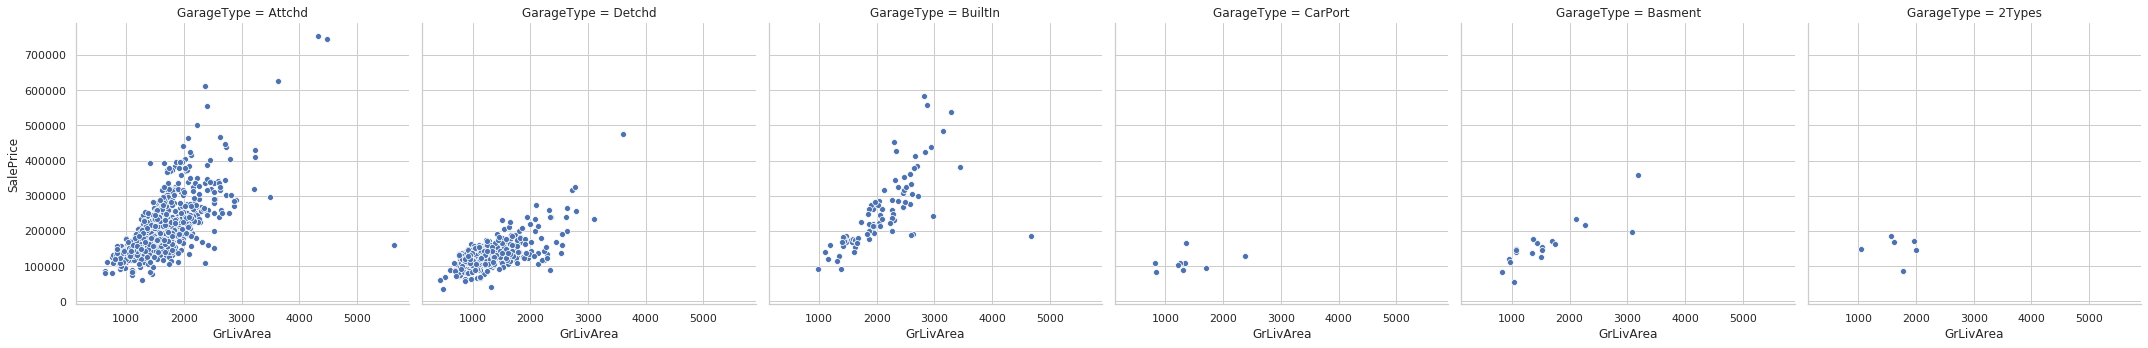

In [ ]:
sns.relplot(x = 'GrLivArea', y = 'SalePrice', col = 'GarageType', data = housing, palette = 'Reds')

### FMRI Data Set

Fmri or functional magnetic resonance imaging is a techniques that measures brain waves. It is frequently used in neuroscientific research. In this section, you we will make some visualisations hoping to find some interesting patterns. 

In [ ]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


As can be seen, there are 5 variables or columns. The first one is the subject, the second one denotes the time point of a certain impuls, event denotes whether there was a stimilus or a 'cue'. The next column shows the region of the brain and the final column displays the strenght of the signal. 

In [ ]:
fmri['event'].value_counts()

stim    532
cue     532
Name: event, dtype: int64

Let us create a basic plot, using the time one the x-axis and signal on the y-axis. 

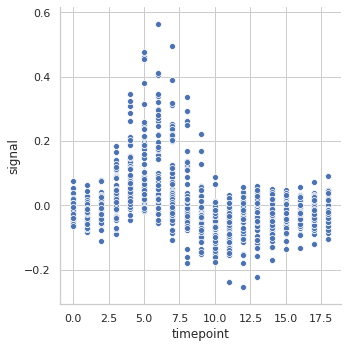

In [ ]:
sns.relplot(x = 'timepoint', y = 'signal', data = fmri)

There is a clear pattern, but let us average all these values by making one smooth line. 

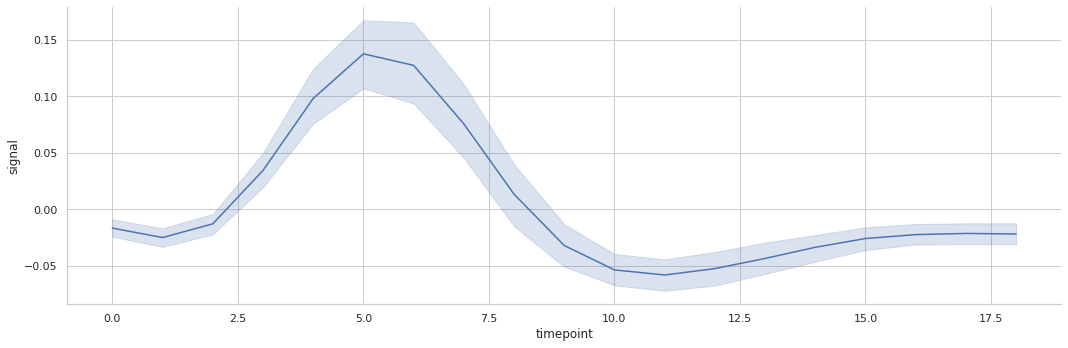

In [ ]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line',data = fmri, aspect =3)

We see that at time = 5, there is a peak in the signal. Let us look at whether this is visible for each subject. 

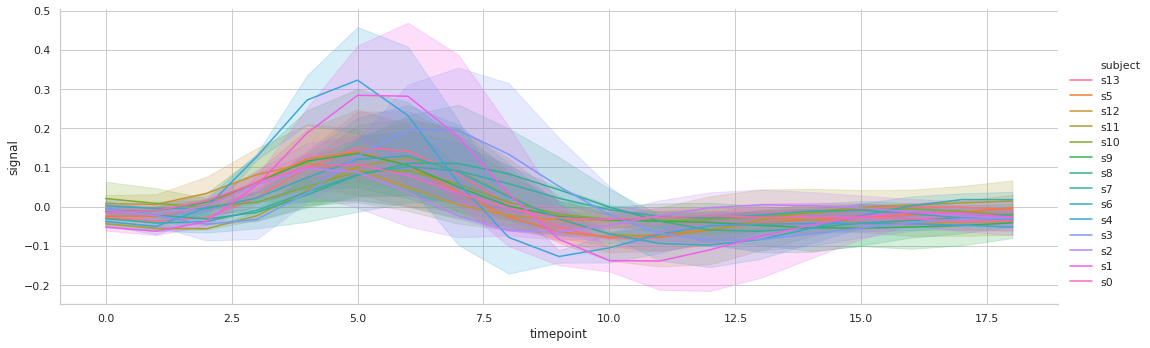

In [ ]:
sns.relplot(x = 'timepoint', y = 'signal', kind = 'line', hue = 'subject', data = fmri, aspect =3)

We can also look at the difference between stim and cue. 

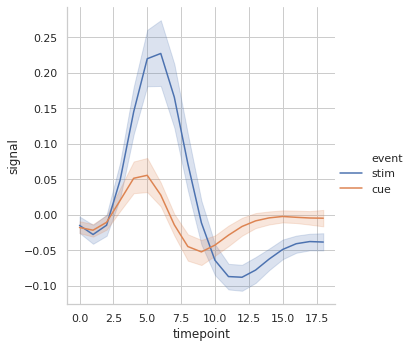

In [ ]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event',kind = 'line', data = fmri)

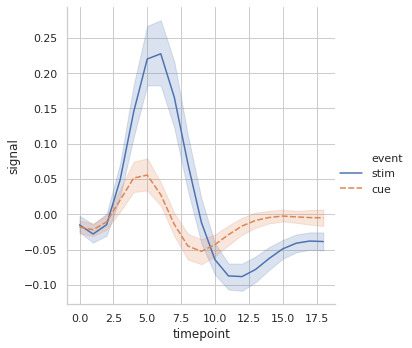

In [ ]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'event', kind = 'line', data = fmri)

Now, let us see how the signal differs per region. 

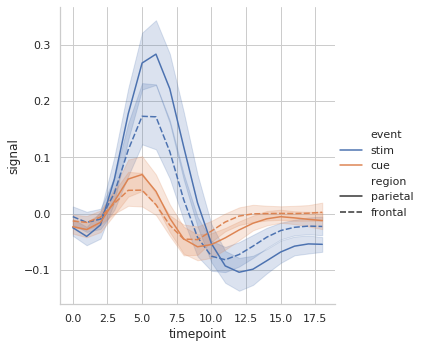

In [ ]:
sns.relplot(x = 'timepoint', y = 'signal', hue = 'event', style = 'region', kind = 'line', data = fmri)  

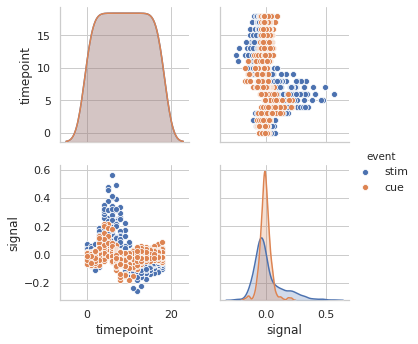

In [ ]:
sns.pairplot(fmri, hue='event')

### Iris Data Set

Now it's your turn to plot some interesting relationships in the data. For this, we will use the classical Iris data set, developed by the statistician Fisher. 

In [ ]:
#load the date
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


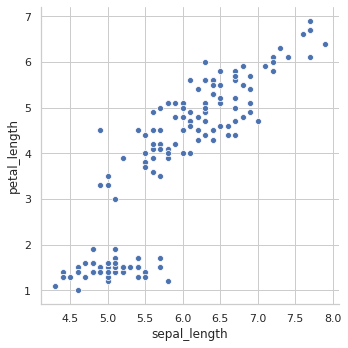

In [ ]:
sns.relplot(x = 'sepal_length', y = 'petal_length', data = iris)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


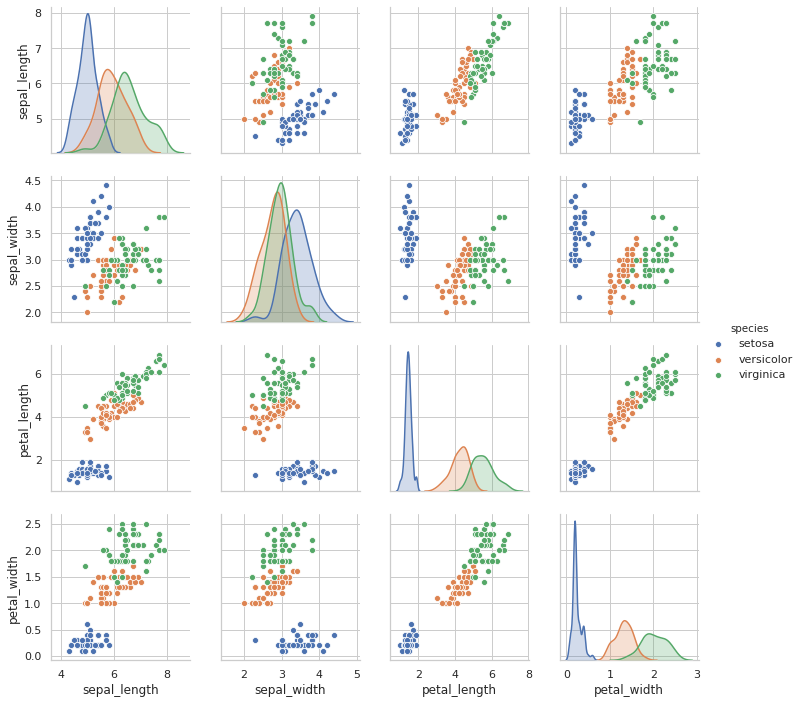

In [ ]:
# Make a pairplot and try to interpret the results.
sns.pairplot(iris, hue='species', size=2.5)

### Time Series Data 1

In this last section, we will look at a special kind of data: time series. This data is different, as it is sequential and plotting it correctly requires some special operations on the Pandas data frame. First, we will read the time series of three different stocks. 

In [ ]:
stocks_AABA = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/AABA_2006-01-01_to_2018-01-01.csv')
stocks_CVX = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/CVX_2006-01-01_to_2018-01-01.csv')
stocks_JPM = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/JPM_2006-01-01_to_2018-01-01.csv')

Now that we have the data, let us combine this data. We will do so using the concat()-method. Furthermore, we need to add a modified data column to the data frame. 

In [ ]:
#Dates to time series 

In [ ]:
# Convert Date to datetime type
concat = pd.concat([stocks_AABA, stocks_CVX, stocks_JPM])
new = pd.to_datetime(concat['Date'])
concat = concat.drop(columns=['Date'])
concat = pd.concat([concat, new], axis=1)
concat.head()

,Open,High,Low,Close,Volume,Name,Date
0,39.69,41.22,38.79,40.91,24232729,AABA,2006-01-03
1,41.22,41.90,40.77,40.97,20553479,AABA,2006-01-04
2,40.93,41.73,40.85,41.53,12829610,AABA,2006-01-05
3,42.88,43.57,42.80,43.21,29422828,AABA,2006-01-06
4,43.10,43.66,42.82,43.42,16268338,AABA,2006-01-09


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


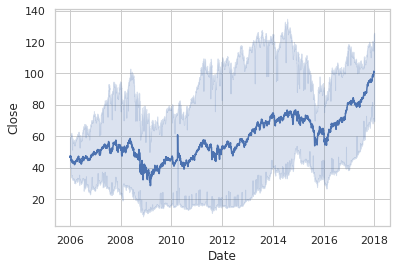

In [ ]:
sns.lineplot(x = 'Date', y = 'Close', data = concat)


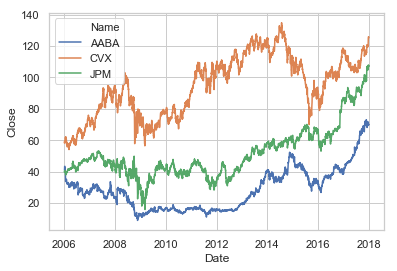

In [ ]:
sns.lineplot(x = 'Date', y = 'Close', hue = 'Name', data = concat)

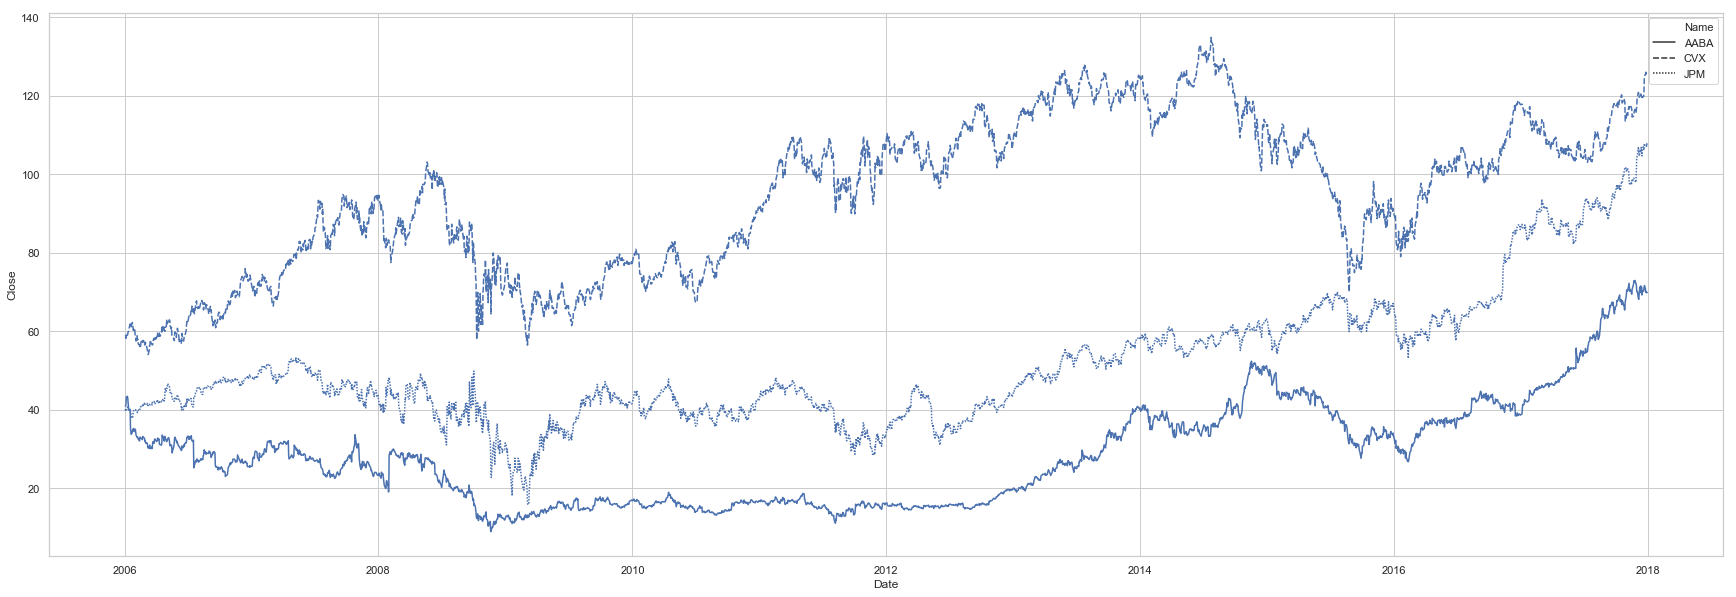

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(x = 'Date', y = 'Close', style = 'Name', data = concat)

### Time Series Data 2

Now it's your turn. Try to plot the data of three stocks. First, load in the data, then concatenate. 

In [ ]:
#Read Data
import pandas as pd
import seaborn as sns
data_MMM = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/MMM_2006-01-01_to_2018-01-01.csv')
data_CSCO = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/CSCO_2006-01-01_to_2018-01-01.csv')
data_GOOGL = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/GOOGL_2006-01-01_to_2018-01-01.csv')

In [ ]:
#Change the 'Date' column to a date_time dtype. 
concat = pd.concat([data_MMM, data_CSCO, data_GOOGL])
new = pd.to_datetime(concat['Date'])
concat = concat.drop(columns=['Date'])
concat = pd.concat([concat, new], axis=1)
concat.head()

,Open,High,Low,Close,Volume,Name,Date
0,77.76,79.35,77.24,79.11,3117200,MMM,2006-01-03
1,79.49,79.49,78.25,78.71,2558000,MMM,2006-01-04
2,78.41,78.65,77.56,77.99,2529500,MMM,2006-01-05
3,78.64,78.90,77.64,78.63,2479500,MMM,2006-01-06
4,78.50,79.83,78.46,79.02,1845600,MMM,2006-01-09


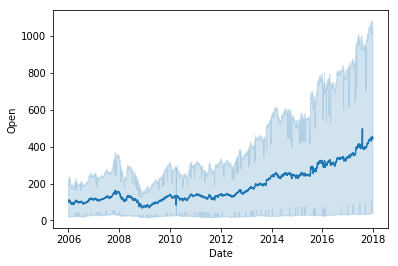

In [ ]:
#Plot the opening prices of the stocks
sns.lineplot(x = 'Date', y = 'Open', data = concat)

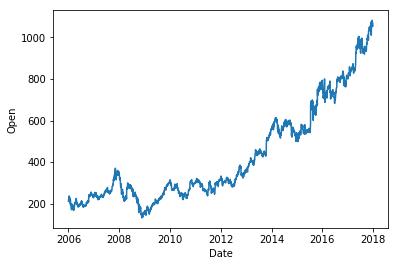

In [ ]:
#Plot the opening prices of just one of the stocks. Hint: use only the data frame for one stock, not the 
# concatenated one.

data_GOOGL = data_GOOGL = pd.read_csv('https://raw.githubusercontent.com/loukjsmalbil/datasets_ws/master/GOOGL_2006-01-01_to_2018-01-01.csv')
new = pd.to_datetime(data_GOOGL['Date'])
data_GOOGL = data_GOOGL.drop(columns=['Date'])
data_GOOGL = pd.concat([data_GOOGL, new], axis=1)
data_GOOGL.dtypes

sns.lineplot(x = 'Date', y = 'Open', data = data_GOOGL)

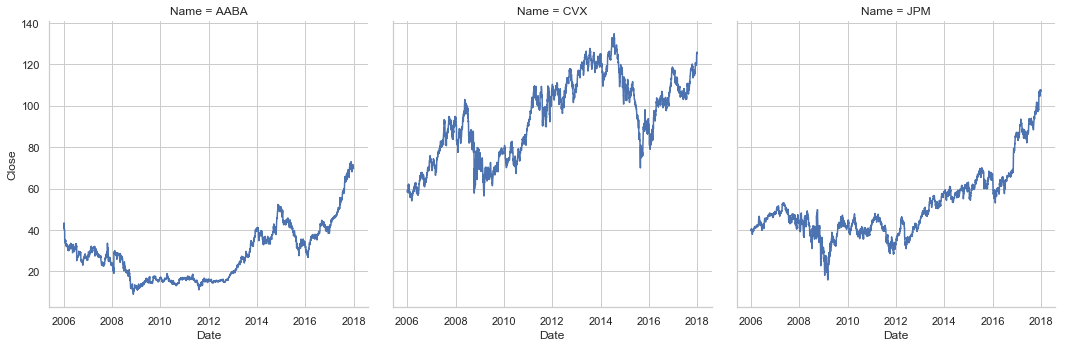

In [ ]:
#Plot all three time series, but this time plot them in three seperate subplots or facetted graphs. Hint: use relplot, not lineplot.
sns.relplot(x = 'Date', y = 'Close', col ="Name", kind ='line', data = concat)

# The End